# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_summary = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
mouse_summary

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [78]:
# Checking the number of mice.
mounse_count = mouse_summary["Mouse ID"].nunique()
mounse_count

248

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mouse_summary[mouse_summary.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_mice 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
dupped_mouse = mouse_summary.loc[mouse_summary["Mouse ID"] == "g989"]
dupped_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_summary = mouse_summary[mouse_summary["Mouse ID"] != "g989"]

In [16]:
# Checking the number of mice in the clean DataFrame.
mounse_count = mouse_summary["Mouse ID"].unique()
mounse_count = len(mounse_count)
mounse_count

248

## Summary Statistics

In [22]:
# drug_stat_summary = mouse_summary.groupby(["Drug Regimen"]).agg("Tumor Volume (mm3)")
# drug_stat_summary

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_stat_summary = mouse_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_stat_summary.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
# drug_stat_summary

quartile = mouse_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
quartile

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_stat_agg = mouse_summary.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Test Length'}, xlabel='Drug', ylabel='Timepoints'>

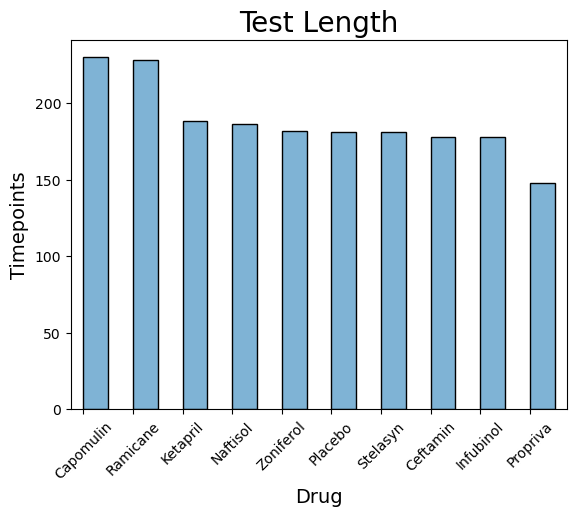

In [98]:
total_timepoint = mouse_summary.groupby('Drug Regimen')['Timepoint'].count()
total_timepoint = total_timepoint.sort_values(ascending= False)
total_timepoint


# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Mouse_bar = total_timepoint.plot(kind= "bar", color= '#7FB3D5', rot=45, align = 'edge', edgecolor = "black", linewidth = 1,
                                 title= "Test Length",
                                 xlabel= "Drug",
                                 ylabel= "Timepoints")
# font touchups
Mouse_bar.title.set_fontsize(20)
Mouse_bar.set_xlabel('Drug', fontsize = 14)
Mouse_bar.set_ylabel('Timepoints', fontsize = 14)

Mouse_bar

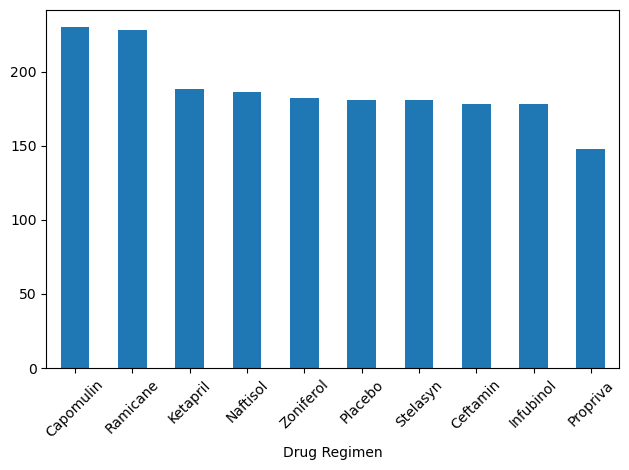

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Mouse_bar = total_timepoint.plot.bar(x= 'Drug Regimen', y= 'Timepoint', rot=45)
plt.tight_layout()




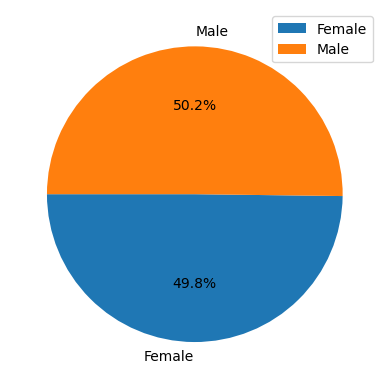

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = mouse_summary.groupby('Sex')['Mouse ID'].nunique().reset_index()

mouse_pie = sex_count.plot(kind ='pie', 
                        y='Mouse ID',
                        labels = sex_count['Sex'], 
                        autopct = '%.1f%%', 
                        ylabel= '',
                        startangle=180)

([<matplotlib.patches.Wedge at 0x1e785b261f0>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

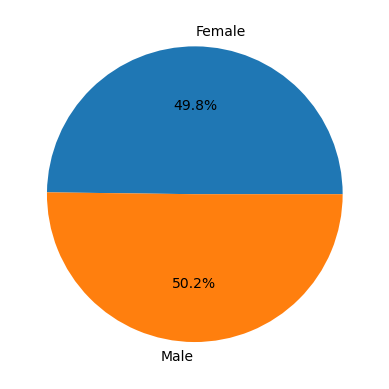

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = sex_count['Mouse ID'].values
pie_labels = sex_count['Sex'].values
py_pie = plt.pie(pie_data, labels = pie_labels, autopct = '%.1f%%')
py_pie


## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_size = mouse_summary.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].max().reset_index()
avg_tumor_size = tumor_size = mouse_summary.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = mouse_summary.groupby(['Mouse ID', 'Drug Regimen'])['Weight (g)'].max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = mouse_summary.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_DF = pd.merge(tumor_size,last_timepoint, on= 'Mouse ID')
tumor_DF = pd.merge(tumor_DF,mouse_weight, on= 'Mouse ID')
tumor_DF = pd.merge(tumor_DF,avg_tumor_size, on= 'Mouse ID') 

tumor_DF

,Mouse ID,Drug Regimen_x,Tumor Volume (mm3)_x,Timepoint,Drug Regimen_y,Weight (g),Drug Regimen,Tumor Volume (mm3)_y
0,a203,Infubinol,56.312708,45,Infubinol,23,Infubinol,56.312708
1,a251,Infubinol,55.237095,45,Infubinol,25,Infubinol,55.237095
2,a262,Placebo,58.611631,45,Placebo,29,Placebo,58.611631
3,a275,Ceftamin,52.770965,45,Ceftamin,28,Ceftamin,52.770965
4,a366,Stelasyn,54.639906,30,Stelasyn,29,Stelasyn,54.639906
...,...,...,...,...,...,...,...,...
244,z435,Propriva,46.942214,10,Propriva,26,Propriva,46.942214
245,z578,Ramicane,38.411510,45,Ramicane,16,Ramicane,38.411510
246,z581,Infubinol,53.979584,45,Infubinol,25,Infubinol,53.979584
247,z795,Naftisol,54.880317,45,Naftisol,29,Naftisol,54.880317


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_dict = {}
outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    treatment_update = mouse_summary.loc[mouse_summary['Drug Regimen'] == treatment]
    tumor_vol_dict[treatment] = treatment_update
    quartiles = treatment_update['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Determine outliers using upper and lower bounds
    oulier_tumor = [x for x in treatment_update['Tumor Volume (mm3)'].values if x <= lowerq and x >= upperq]                              
    outliers = treatment_update[['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]


print("Here are your outliers!!")
print("")
print(outliers)
    

    
    
    
    

Here are your outliers!!

     Mouse ID  Tumor Volume (mm3)  Timepoint
484      a275           45.000000          0
485      a275           46.795257          5
486      a275           47.371343         10
487      a275           49.734404         15
488      a275           50.513437         20
...       ...                 ...        ...
1851     y865           57.173538         25
1852     y865           59.033275         30
1853     y865           61.153140         35
1854     y865           63.469549         40
1855     y865           64.729837         45

[178 rows x 3 columns]


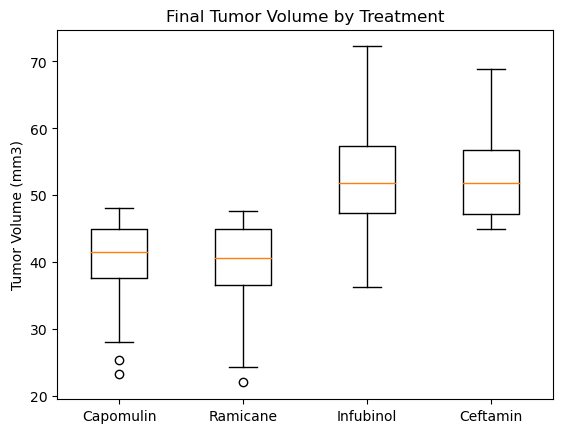

In [140]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_dict.values())
plt.xticks(range(1, len(treatments) + 1), treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Treatment')
plt.show()


## Line and Scatter Plots

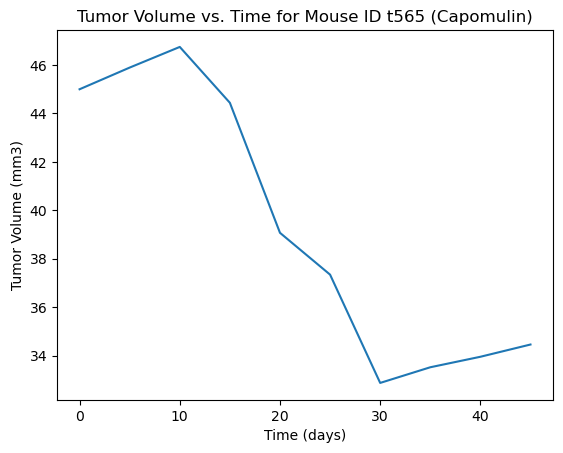

In [149]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# lets make it so it can cycle through all potential mice
rando_mouse = mouse_summary.loc[mouse_summary['Drug Regimen'] == 'Capomulin']
mouse_id = rando_mouse['Mouse ID'].sample().values[0]

line_mouse = mouse_summary.loc[mouse_summary['Mouse ID'] == mouse_id, 'Tumor Volume (mm3)'].values
timepoints = mouse_summary.loc[mouse_summary['Mouse ID'] == mouse_id]['Timepoint'].values

plt.plot(timepoints, line_mouse)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time for Mouse ID {mouse_id} (Capomulin)')
plt.show()

Text(0.5, 1.0, 'Mouse Weight to Tumor Size')

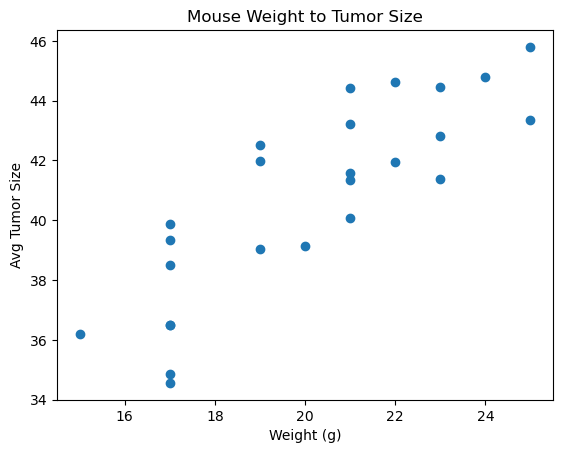

In [162]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


scatter_df = tumor_DF.loc[tumor_DF['Drug Regimen_x'] == 'Capomulin']


plt.scatter(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)_y'])

# add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Size')
plt.title('Mouse Weight to Tumor Size')

## Correlation and Regression

The correlation between mouse weight and tumor size is 0.84!!


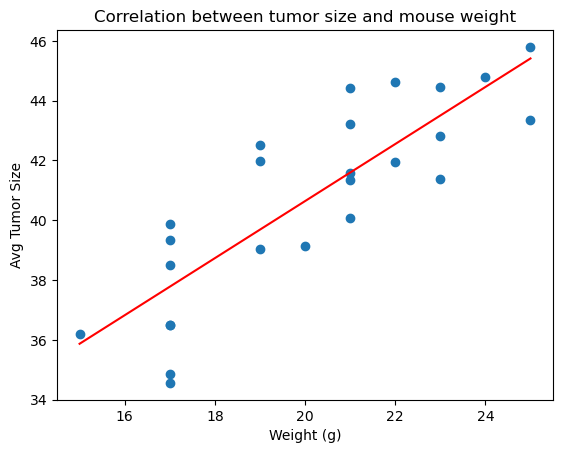

In [164]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr,pv= st.pearsonr(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)_y'])

print(f"The correlation between mouse weight and tumor size is {corr:.2f}!!")

plt.scatter(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)_y'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Size')
plt.title('Correlation between tumor size and mouse weight')
plt.plot(np.unique(scatter_df['Weight (g)']),
        np.poly1d(np.polyfit(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)_y'], 1))
         (np.unique(scatter_df['Weight (g)'])), color='red')